# DMML Terminal Assessment


# Vani Mirg: x19211538

Dataset 2: Bank Marketting

The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return.

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

The 4 Ps:
1) Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign.

2) Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)

3) Price: What is the best price to offer to potential clients? (In the case of the bank's marketing campaign this is not necessary since the main interest for the bank is for potential clients to open depost accounts in order to make the operative activities of the bank to keep on running.)

4) Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an indepth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

TERM DEPOSIT: A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

# Attributes Description

Bank Client Data

1 - age: (numeric)
    
2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    
3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    
4 - education: (categorical: primary, secondary, tertiary and unknown)
    
5 - default: has credit in default? (categorical: 'no','yes','unknown')
    
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
8 - balance: Balance of the individual.

    
Related with the last contact of the current campaign

8 - contact: contact communication type (categorical: 'cellular','telephone')
    
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
        
Other Attributes

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
14 - previous: number of contacts performed before this campaign and for this client (numeric)
    
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Target Variable:

Y: Has the client subscribed a term deposit? 'Yes','No'

In [1]:
!pip install folium
!pip install tpot
!pip install chart-studio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn.metrics

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import  train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import  StratifiedKFold
from sklearn.model_selection import GridSearchCV
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from matplotlib.gridspec import GridSpec
# cols=['#00876c','#85b96f','#f7e382','#f19452','#d43d51']



C:\Users\Vani\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning:




In [3]:
df=pd.read_csv('bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Summary:
    
Mean age is apporximately 41 years.(Minimum 18 years old and Maximum 95 years old)

The mean balance is 1,528. However, the Standard Deviation is high number so we can understand through this that the balance is heavily distributed across the dataset.

As the data information said it will be better to drop the duraton column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never recieved calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probablity the target client will open a term deposit since a higher duration means a higher interst (commitment) from the potential client.

In [6]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of rows: {}'.format(df.shape[0]))

print('Number of quantitative features: {}'.format(len([d for d in df.columns if df.dtypes[d] != 'object'])))
print('Number of qualitative features: {}'.format(len([d for d in df.columns if df.dtypes[d] == 'object'])))

Number of features: 17
Number of rows: 11162
Number of quantitative features: 7
Number of qualitative features: 10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

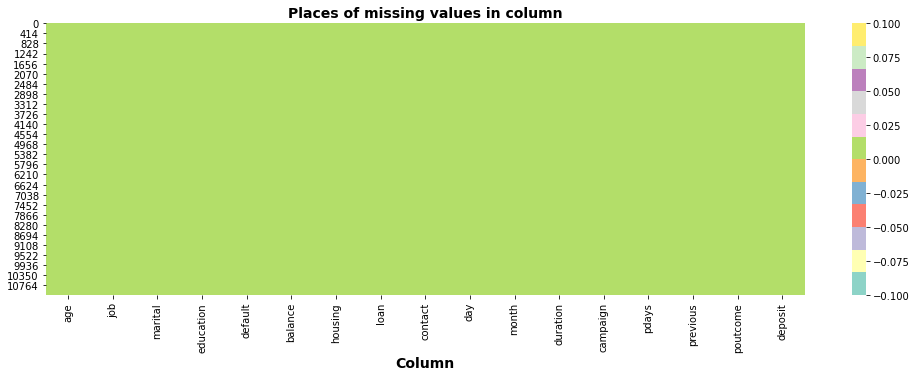

In [9]:
#plottimg heatmap of missing values

plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(), cbar=True, cmap="Set3")
plt.xlabel("Column", size=14, weight="bold")
plt.title("Places of missing values in column", fontweight='bold', size=14)
plt.show()

# Exploratory Data Analysis

# Visualisation 1

C:\Users\Vani\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



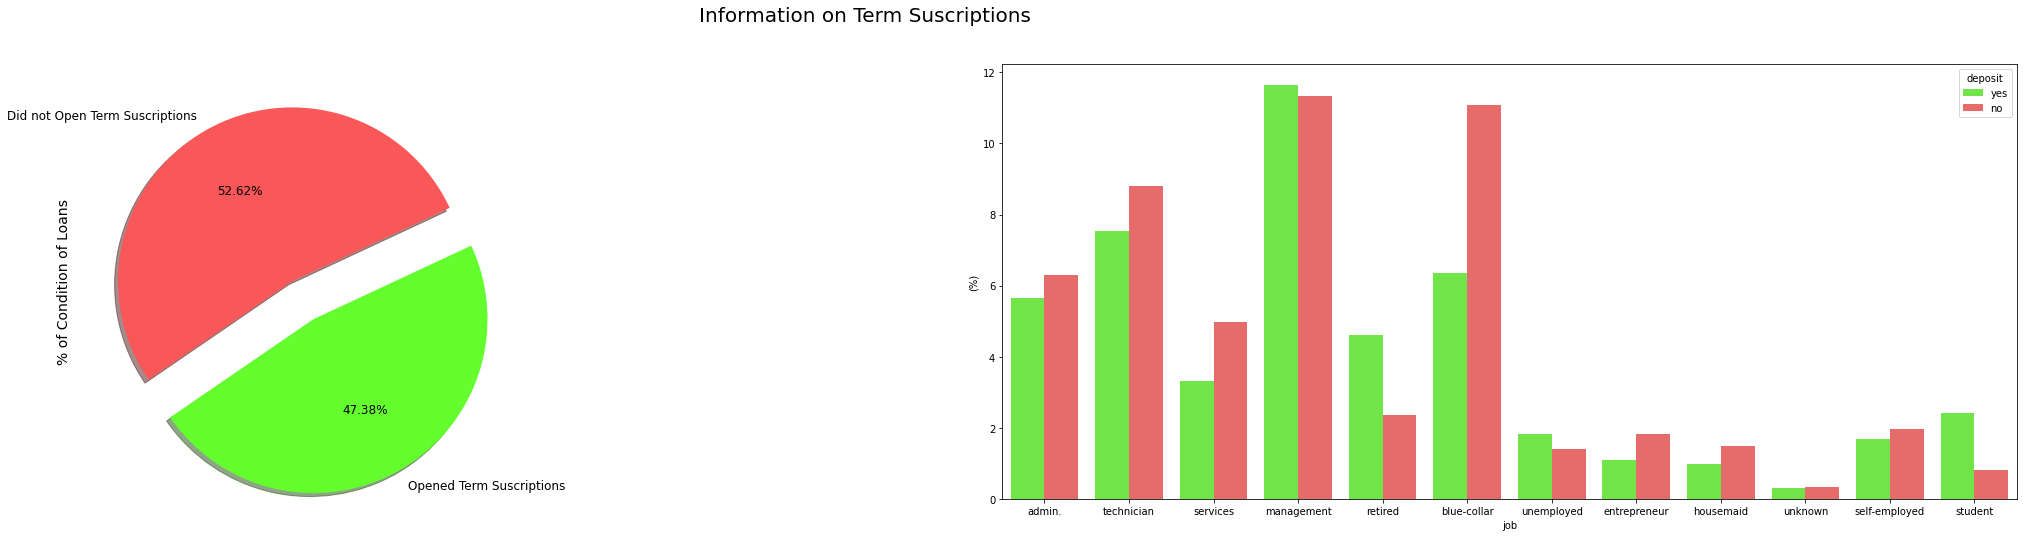

In [10]:
f, ax = plt.subplots(1,2, figsize=(40,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="job", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["job"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

# Visualizations 2: Exploring Numerical Data

C:\Users\Vani\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.



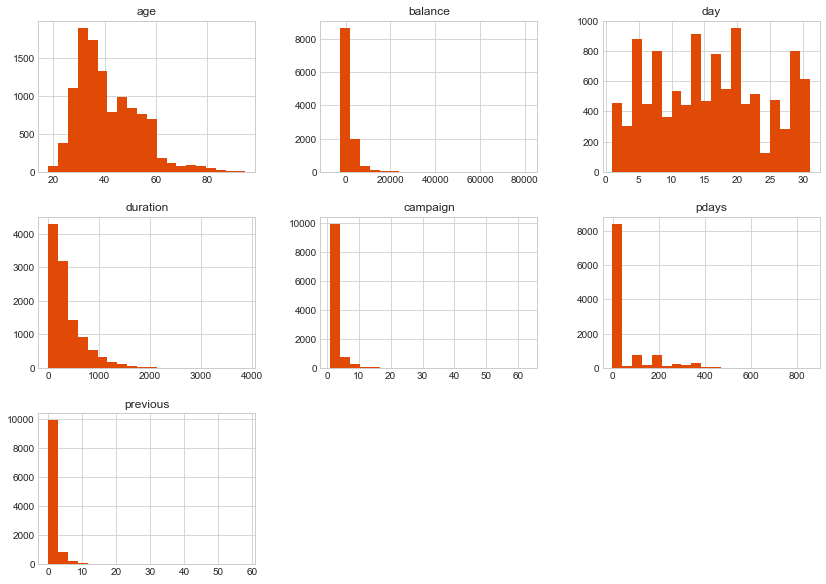

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

# Visualtion 3: Categorical plots
    

C:\Users\Vani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='job', ylabel='balance'>

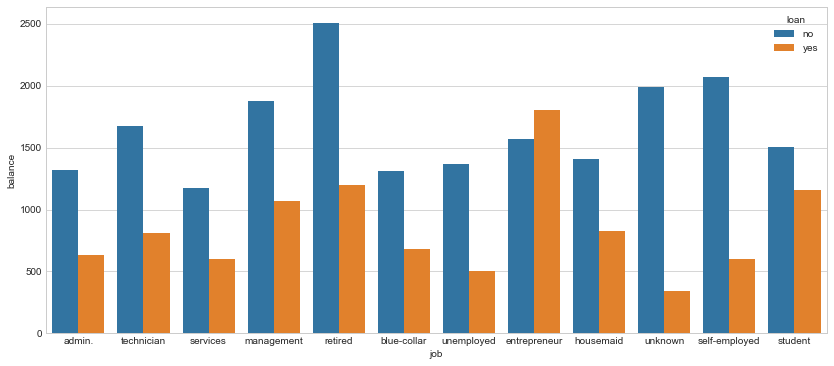

In [12]:
plt.figure(figsize=(14,6))
sns.barplot(df.job, df.balance,hue=df.loan, ci=None)

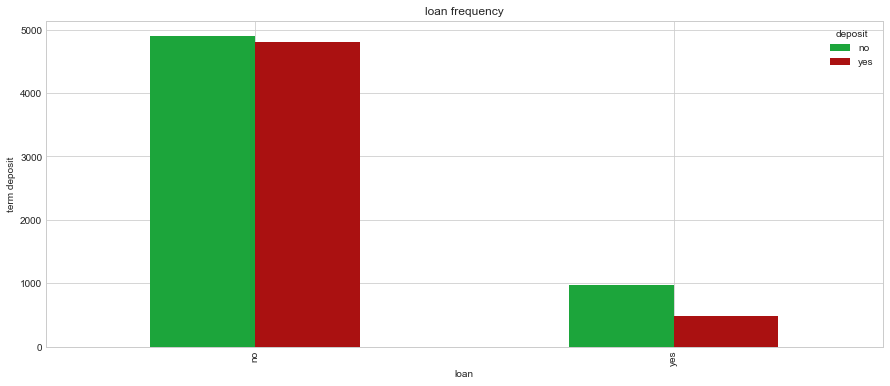

In [13]:
pd.crosstab(df.loan,df.deposit).plot(kind='bar', figsize=(15,6), color=['#1CA53B','#AA1111'])
plt.title('loan frequency')
plt.xlabel('loan')
plt.ylabel('term deposit')
plt.show()

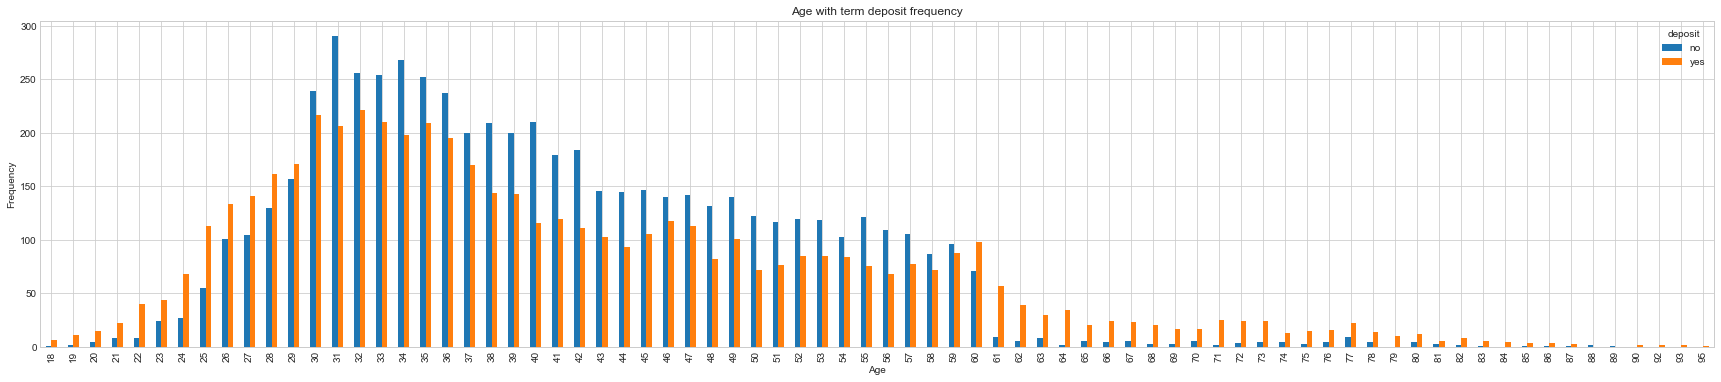

In [14]:
pd.crosstab(df.age,df.deposit).plot(kind="bar",figsize=(30,6))
plt.title('Age with term deposit frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

# Visualisation 4:Barplot showing categorical features with deposit

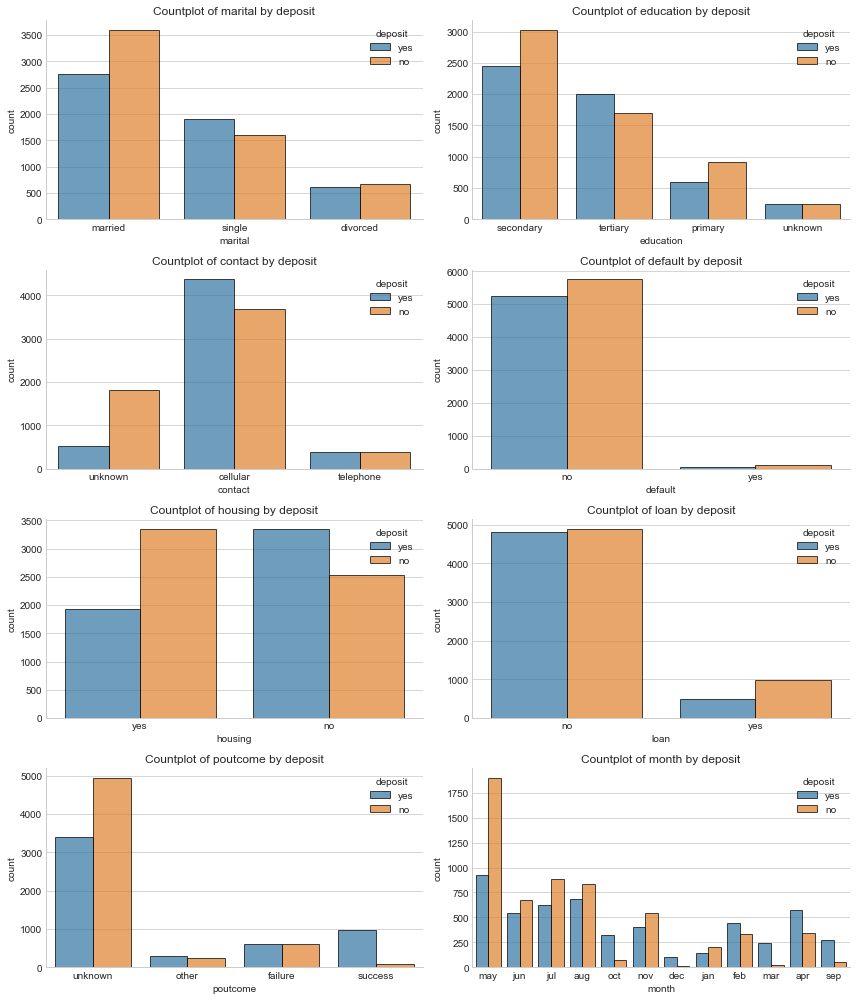

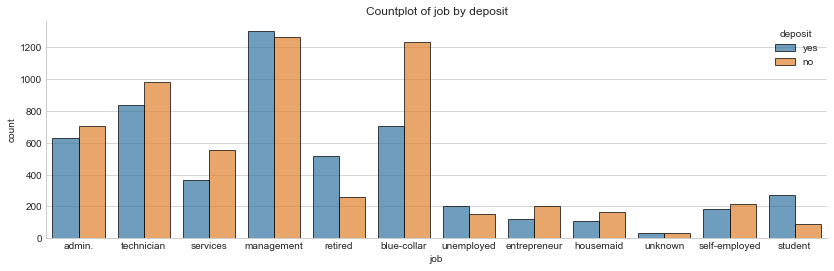

In [15]:
plt.figure(figsize=[12,14])
features=['marital','education','contact','default','housing','loan','poutcome','month']

n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='deposit', edgecolor='black', alpha=0.7, data= df)
    sns.despine()
    plt.title("Countplot of {} by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()

plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='deposit', edgecolor='black', alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

In [16]:
!pip install shap
!pip install yellowbrick

# Visualisation 5

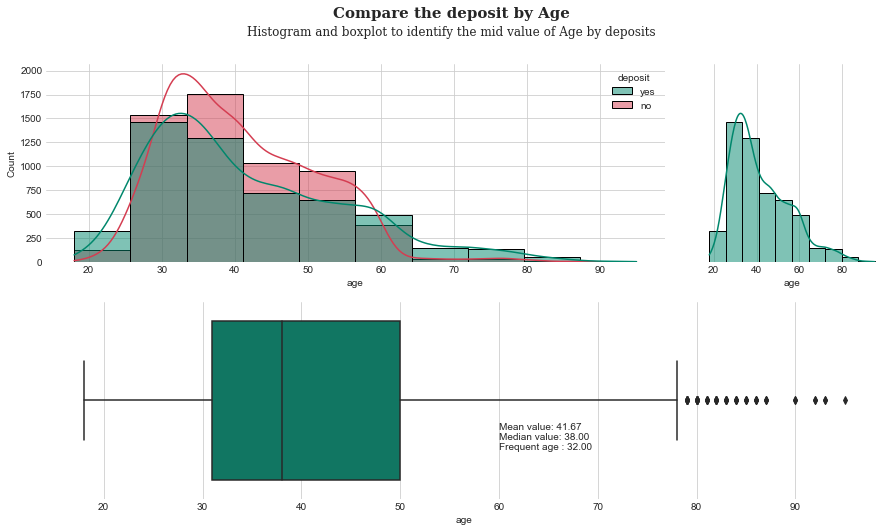

In [17]:
fig=plt.figure(figsize=(15,8), facecolor=(0.2,0.0,0.0,0.0), edgecolor='black')
plt.suptitle("Compare the deposit by Age", family='Serif', size=15,weight='bold')

plt.figtext(0.5,0.93,"Histogram and boxplot to identify the mid value of Age by deposits", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=2, ncols=4, figure=fig)
ax1=plt.subplot(gs[0,:3])


sns.histplot(data=df, x='age', bins=10, ax=ax1, kde=True, hue='deposit', multiple='layer', element='bars', palette=['#00876c','#d43d51']);
ax2=plt.subplot(gs[0,3:4], sharey=ax1)
sns.histplot(data=df[df['deposit']=='yes'], x='age', bins=10, ax=ax2, kde=True, color=['#00876c']);
ax2.yaxis.set_visible(False)

ax4=plt.subplot(gs[1,:4])
sns.boxplot(data=df[df['deposit']=='yes'], x='age', ax=ax4, palette=['#00876c']);
ax4.yaxis.set_visible(False)
ax4.text(60,0.15,"Mean value: {:.2f}".format(df[df['deposit']=='yes']['age'].mean()))
ax4.text(60,0.20,"Median value: {:.2f}".format(df[df['deposit']=='yes']['age'].median()))
ax4.text(60,0.25,"Frequent age : {:.2f}".format(df[df['deposit']=='yes']['age'].mode().max()))
for i in ['left','right','bottom','top']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)



Observation from the above graph, deposit starts at the age of 20+ and peak is between 30,50.

Frequently deposit age is 32

Non deposit age is between 30-50 with mean around 35-30 years

# Visualization 7

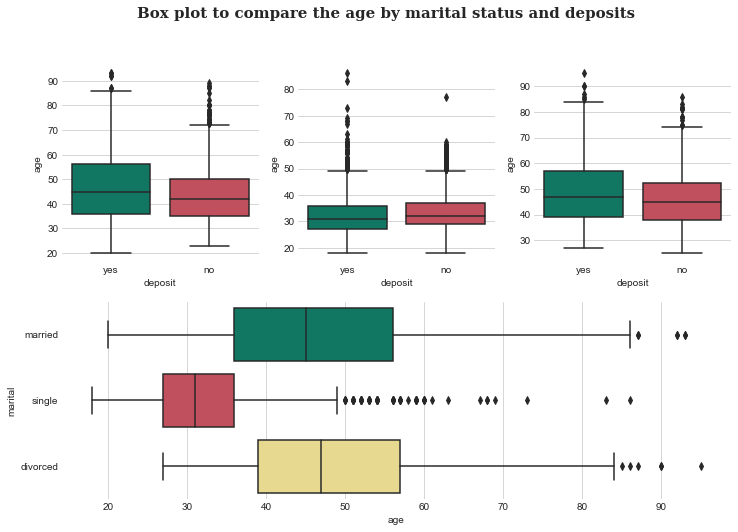

In [18]:
fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age by marital status and deposits", family='Serif', weight='bold', size=15)
for i,c in enumerate(df['marital'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['marital']==c]['age'], x=df['deposit'],palette=['#00876c','#d43d51']);
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    

ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['deposit']=='yes'],y='marital',x='age', palette=['#00876c','#d43d51','#f7e382'])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Observation from the above graph:

It is obvious that single's deposit is less compared to married and divroced.

Married average age starts from 35+ to 60.

Divorced age is between 40 to 60 and single age is between 28 to 35 (Reason could be that the single  might get married after 35 years approx)

# Visualisation 8

 Observation : People who have loan, have not deposited



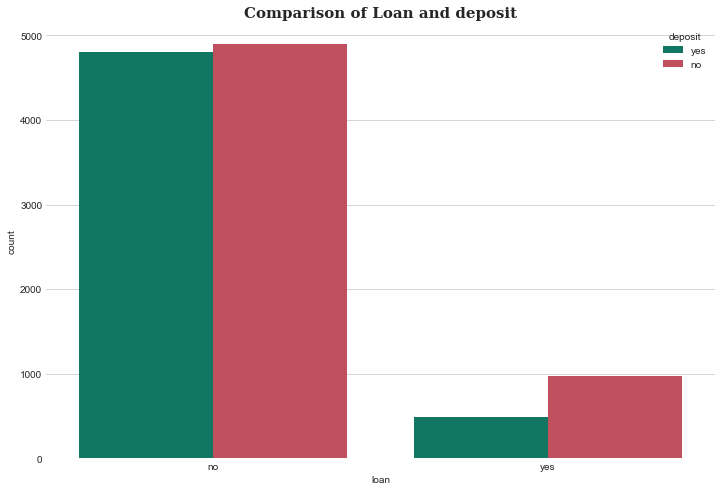

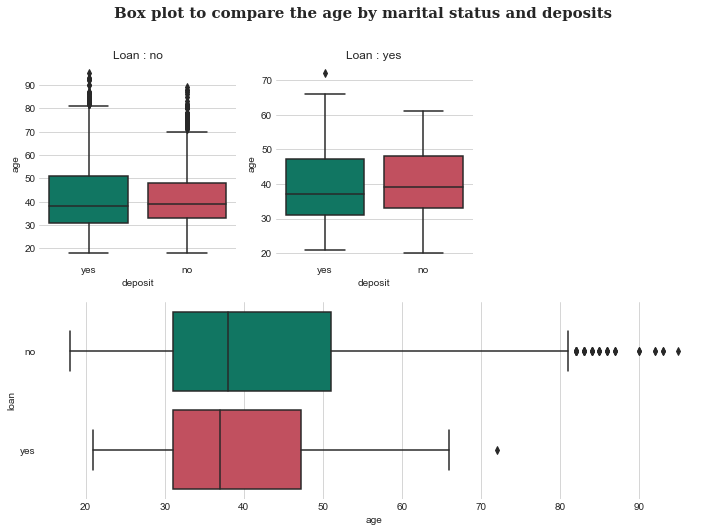

In [19]:
fig = plt.figure(figsize=(12,8))
ax=sns.countplot(data=df, x='loan', hue='deposit', palette=['#00876c','#d43d51'])
ax.set_title('Comparison of Loan and deposit', font='Serif', weight='bold', size=15)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

print(" Observation : People who have loan, have not deposited\n")


fig = plt.figure(figsize=(12,8))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
plt.suptitle("Box plot to compare the age by marital status and deposits", family='Serif', weight='bold', size=15)
for i,c in enumerate(df['loan'].unique()):
    ax=plt.subplot(gs[0,i])
    ax=sns.boxplot(y=df[df['loan']==c]['age'], x=df['deposit'],palette=['#00876c','#d43d51']);
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title("Loan : {}".format(c))

ax=plt.subplot(gs[1,:])
ax=sns.boxplot(data=df[df['deposit']=='yes'],y='loan',x='age', palette=['#00876c','#d43d51','#f7e382'])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Observation: Loan has bigger impact on the deposits.

People who have loans and less deposits

People depsoted with loan is between the age of 30 and 50.

People deposited wihtout loan is from 30 to 60, which means that people getting old prefers deposits than the loan

# Visualization 9

In [20]:
df.groupby(['loan']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
loan,,,,,,,,
no,9702.0,41.377139,12.196502,18.0,32.0,39.0,49.0,95.0
yes,1460.0,40.267123,9.775752,20.0,32.0,39.0,48.0,72.0


In [21]:
df.groupby(['deposit']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
deposit,,,,,,,,
no,5873.0,40.837391,10.264815,18.0,33.0,39.0,48.0,89.0
yes,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0


(0.0, 4000.0)

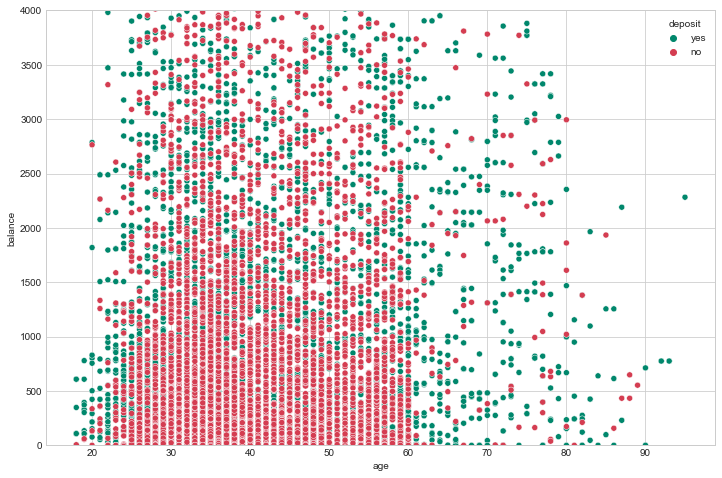

In [22]:
fig = plt.figure(figsize=(12,8))
ax=sns.scatterplot(data=df, x='age',y='balance', hue='deposit',palette=['#00876c','#d43d51'])
ax.set_ylim(0,4000)

Observation: There is no significant relationship between age and balance

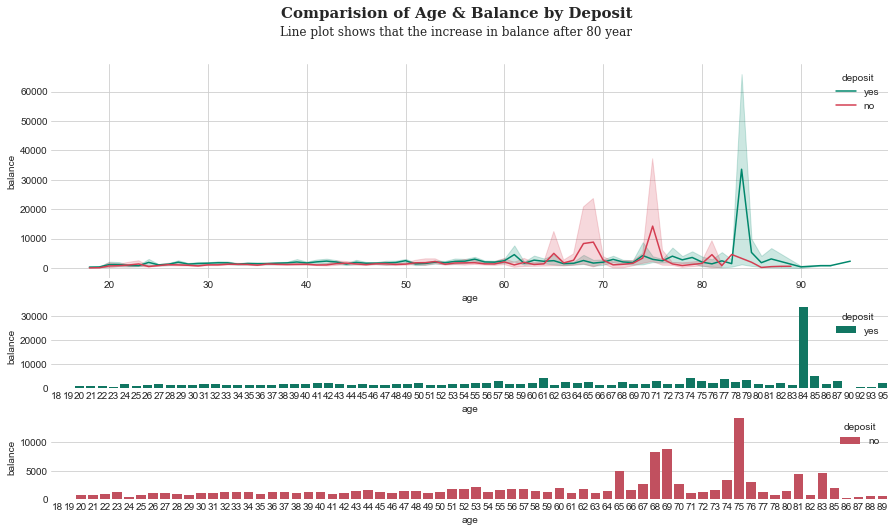

In [23]:
fig=plt.figure(figsize=(15,8))

plt.suptitle("Comparision of Age & Balance by Deposit", family='Serif', size=15, ha='center', weight='bold')
plt.figtext(0.5,0.93,"Line plot shows that the increase in balance after 80 year", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=3, ncols=1, height_ratios=[5,2,2])
ax1=plt.subplot(gs[0,0])
ax1=sns.lineplot(data=df,y='balance',x='age', hue='deposit',palette=['#00876c','#d43d51'])
ax2=plt.subplot(gs[1,0])
ax2=sns.barplot(data=df[df['deposit']=='yes'],y='balance',x='age', hue='deposit', palette=['#00876c'], ci=False)
ax3=plt.subplot(gs[2,0])
ax3=sns.barplot(data=df[df['deposit']=='no'],y='balance',x='age', hue='deposit', palette=['#d43d51'], ci=False)
for i in ['left','right','bottom','top']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

Observation: Balance in deposit increases by age

(-5000.0, 20000.0)

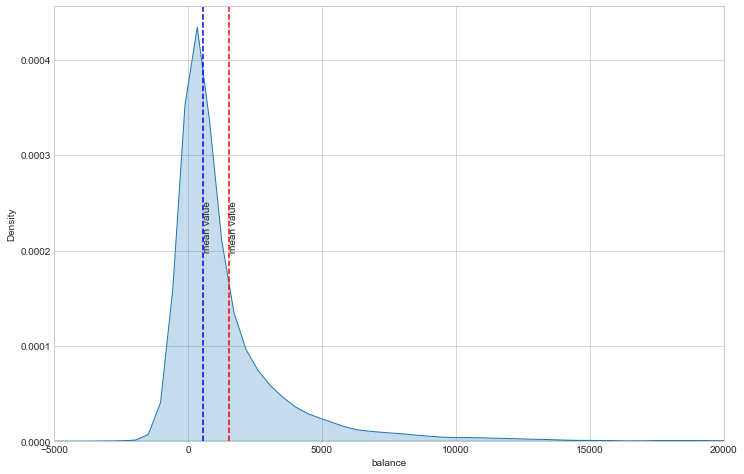

<Figure size 864x576 with 0 Axes>

In [24]:
fig=plt.figure(figsize=(12,8))
ax=sns.kdeplot(df['balance'], fill=True,palette=['#00876c','#d43d51'])
ax.axvline(df['balance'].mean(),c='r',ls='--')
ax.text(x=df['balance'].mean(),y=0.0002,s="mean value", rotation=90)
fig=plt.figure(figsize=(12,8))
ax.axvline(df['balance'].median(),c='blue',ls='--')
ax.text(x=df['balance'].median(),y=0.0002,s="mean value", rotation=90)
ax.set_xlim(-5000,20000)

<AxesSubplot:xlabel='campaign', ylabel='count'>

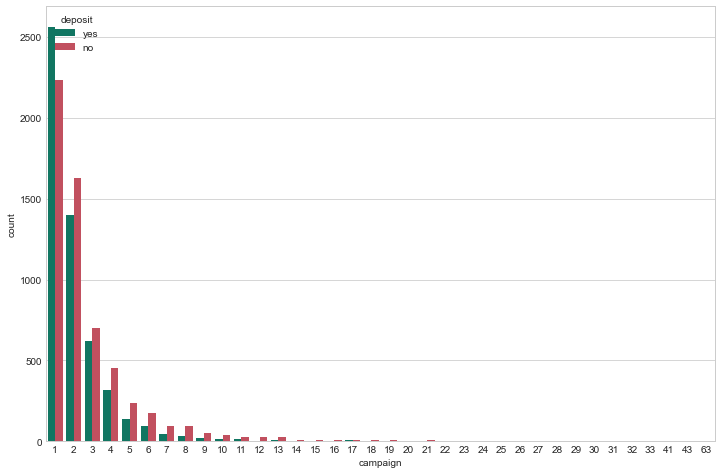

In [25]:
# lets check if campaign has significant change in deposit
fig=plt.figure(figsize=(12,8))
sns.countplot(data=df,x='campaign',hue='deposit', palette=['#00876c','#d43d51'])

# Visualisation 10: Comparision of Education with deposit

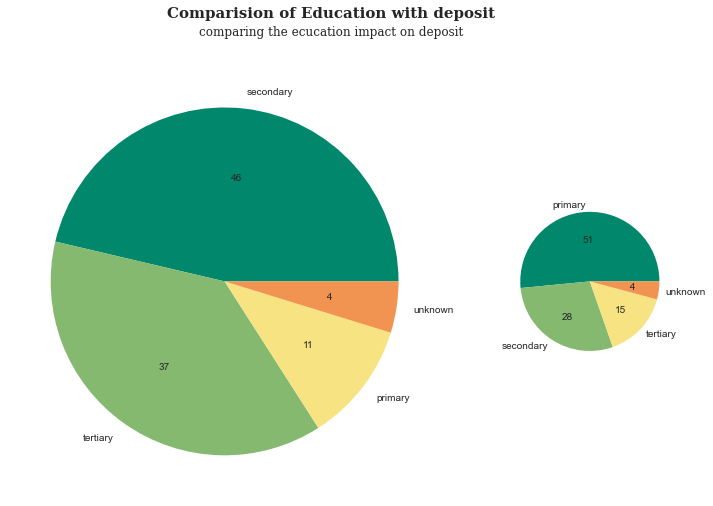

In [26]:
cols=['#00876c','#85b96f','#f7e382','#f19452','#d43d51']
fig = plt.figure(figsize=(12,8))
plt.suptitle("Comparision of Education with deposit", family='Serif', size=15, ha='center', weight='bold')
plt.figtext(0.5,0.93,"comparing the ecucation impact on deposit", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=1, ncols=2, width_ratios=[5,2])
ax1=plt.subplot(gs[0,0])
ax1=plt.pie(df[df['deposit']=='yes']['education'].value_counts(), labels=df[df['deposit']=='yes']['education'].unique(), autopct='%2d', colors=cols)
ax2=plt.subplot(gs[0,1])
ax2=plt.pie(df[df['deposit']=='no']['education'].value_counts(), labels=df[df['deposit']=='no']['education'].unique(), autopct='%2d', colors=cols)

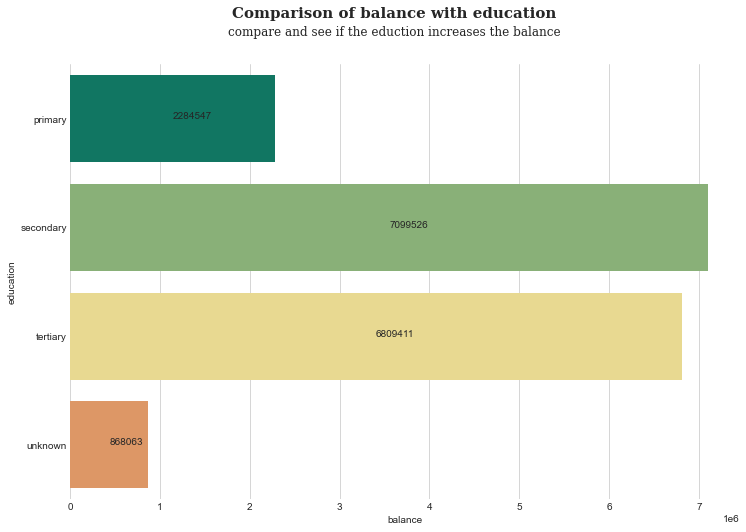

In [27]:
fig = plt.figure(figsize=(12,8))
df1=df.groupby('education')['balance'].sum().reset_index()
plt.suptitle("Comparison of balance with education", family='Serif', size=15, ha='center', weight='bold')
plt.figtext(0.5,0.93,"compare and see if the eduction increases the balance", family='Serif', size=12, ha='center')
ax=sns.barplot(data=df1, y='education',x='balance', palette=cols, ci=False)
#ax.set_xlim(0,20000)
for i in ['left','right','bottom','top']:
    ax.spines[i].set_visible(False)

for y,x in enumerate(df1['balance']):
    ax.text(x=x/2,y=y, s=x)


# Visualisation 11

# Visualization 12: Distribution of Ages by Occupation

In [28]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

# Visualization 13: Balance Distribution with occupation

In [29]:
# Balance Distribution

# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

# Visualization 14

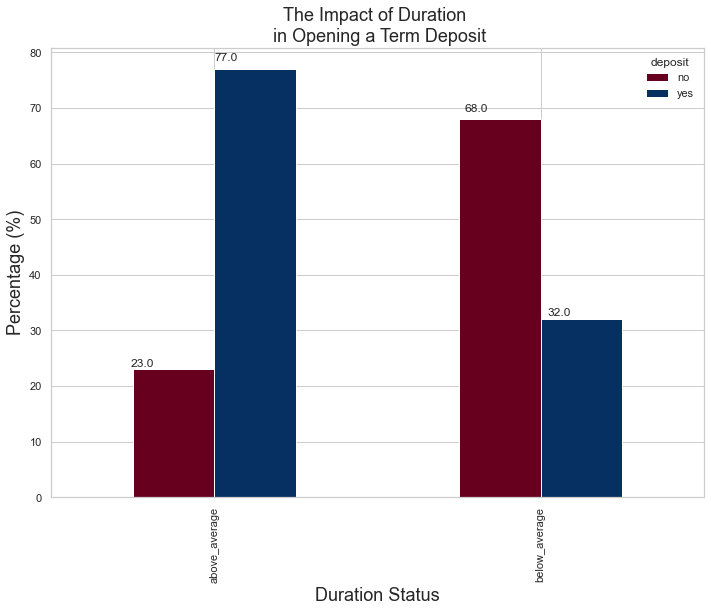

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

# Model Building

In [31]:
#One hot encoding

df['deposit']=df['deposit'].map({'yes':1, 'no':0})

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,duration_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,low,above_average
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,low,above_average
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,low,above_average
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,low,above_average
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,low,above_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0,low,below_average
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0,low,below_average
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0,low,below_average
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0,low,below_average


In [33]:
df2=pd.get_dummies(df,drop_first=True)
df2

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,balance_status_low,balance_status_middle,balance_status_negative,duration_status_below_average
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [34]:
X=df2.drop(['deposit'], axis=1)
y=df2['deposit']

Stratified Sampling:
Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this?


Personal Loans:
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?
1) We need to see how our data is distributed.
2) After noticiing that the column of loan contains 87% of "no" (Does not have personal loans) and 13% of "yes" (Have personal loans.)
3) We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes"." Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order to avoid overfitting of our data we must implement a cross validation however, we must make sure that at least the features that have the greatest influence on our label (whether a potential client will open a term deposit or not) is equally distributed. What do I mean by this?


Personal Loans:
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?

1) We need to see how our data is distributed.
2) After noticiing that the column of loan contains 87% of "no" (Does not have personal loans) and 13% of "yes" (Have personal loans.)
3) We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes".

# Train Test Split

In [35]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [36]:
#Standardise the variables

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [37]:
accuracy={}

# Decision Tree

0.8235294117647058
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1742
           1       0.83      0.80      0.81      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Accuracy of Decision Tree: 78.53%


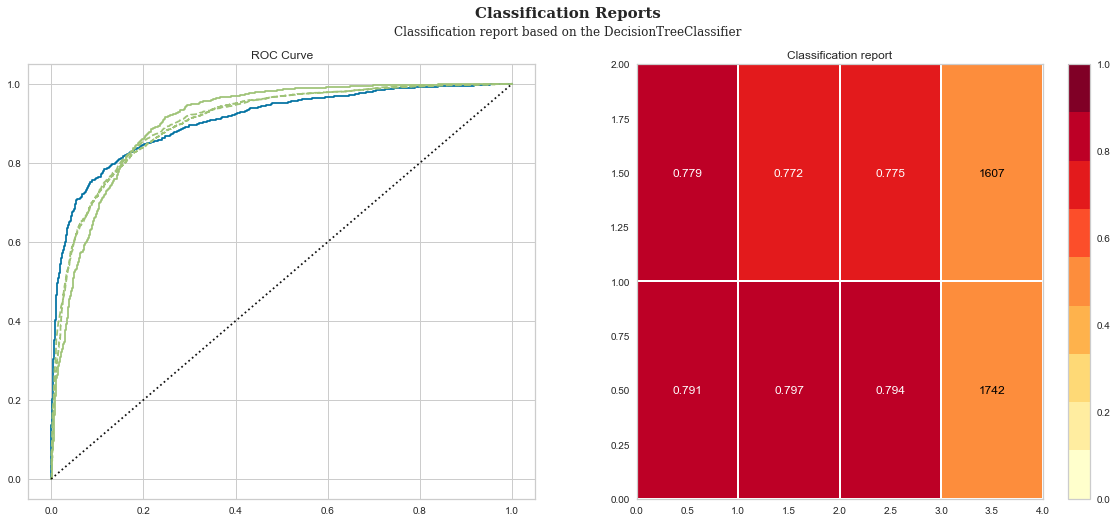

In [40]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ROCAUC, ClassificationReport, ClassificationScoreVisualizer
mdc = DecisionTreeClassifier()
mdc.fit(X_train, y_train)
mdc.score(X_test ,y_test)
pred=model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

## Yellow brick reports
fig = plt.figure(figsize=(20,8))
gs=GridSpec(nrows=1, ncols=2)
plt.suptitle("Classification Reports", family='Serif', size=15, ha='center', weight='bold')
plt.figtext(0.5,0.93,"Classification report based on the DecisionTreeClassifier", family='Serif', size=12, ha='center')
ax1=plt.subplot(gs[0,0])
ax1.set(title='ROC Curve')
visual = ROCAUC(model, classes=[0,1])
visual.fit(X_train,y_train)
ax1=visual.score(X_test,y_test)

ax2=plt.subplot(gs[0,1])
ax2.set(title='Classification report')
ax2=ClassificationReport(mdc,classes=[0,1], support=True).fit(X_train,y_train).score(X_test,y_test)


acc = mdc.score(X_test, y_test)*100
accuracy['Decision Tree'] = acc
print ("Accuracy of Decision Tree: {:.2f}%".format(acc))

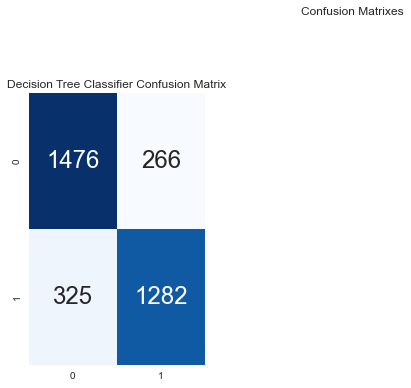

In [41]:
#Confusion Metric for Decision Tree
y_head_dtc =model.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

plt.figure(figsize=(12,12))


plt.suptitle("Confusion Matrixes",fontsize=12)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

# Gradient Boost Classifier

In [45]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier


grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()



In [46]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [47]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))


Gradient Boost Classifier accuracy is 0.85


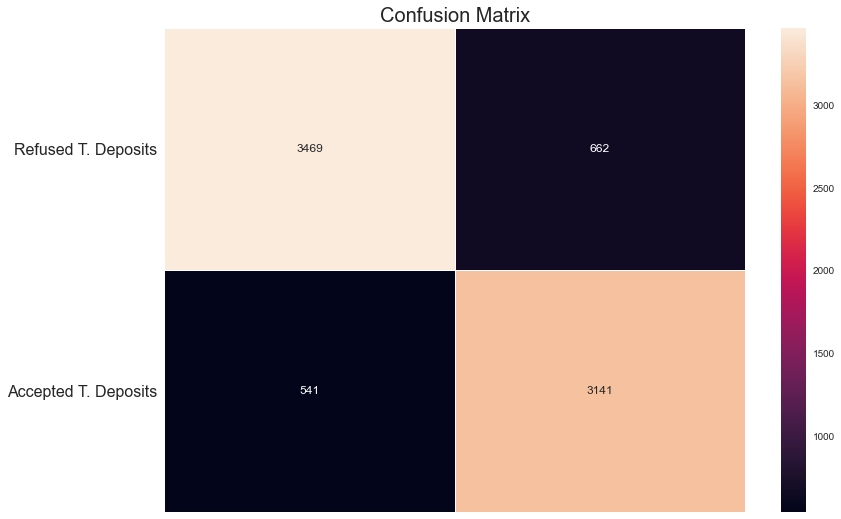

In [48]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

Precision and Recall:
Recall: Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.

Precision: Means how sure is the prediction of our model that the actual label is a "Yes".

As the precision gets higher the recall gets lower and vice versa. For instance, if we increase the precision from 30% to 60% the model is picking the predictions that the model believes is 60% sure. If there is an instance where the model believes that is 58% likely to be a potential client that will suscribe to a term deposit then the model will classify it as a "No." However, that instance was actually a "Yes" (potential client did suscribe to a term deposit.) That is why the higher the precision the more likely the model is to miss instances that are actually a "Yes"!

In [49]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.8259268998159348
Recall Score:  0.8530689842476915


In [50]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.8392785571142285

In [51]:
some_instance =X_train[990]

In [52]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([1.01436293])

In [53]:
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [54]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")

In [55]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)


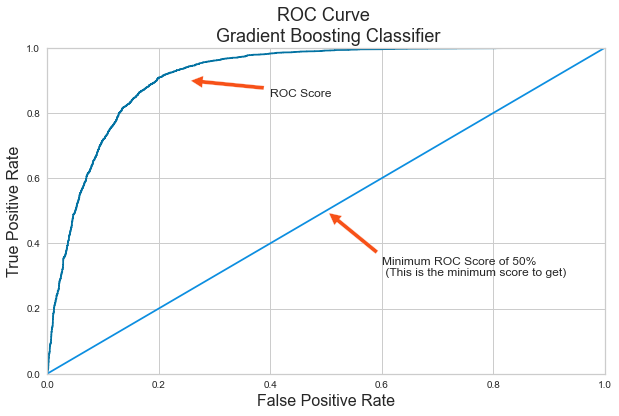

In [61]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score  ', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

The people who younger than 30 and older than 60 years old most likely to subscribe for term deposit.

Age attribute confirmed with job attribute. Because Retired and Students are most likely to subscribe for term deposit.

Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.

Divorced have a considerably low amount of balance.

Education significant impact the amount of balance.

Customers are more willing to invest either before 8th or after 23rd of the month.

Potential clients opted to suscribe term deposits during the seasons of fall and winter.

Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

Target individuals with a higher duration (above 375): Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.

Solutions for the Next Marketing Campaign (Conclusion):
1) Months of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)

2) Seasonality: Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

3) Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.

4) Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.

5) Occupation: Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

6) House Loans and Balances: Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.


7) Develop a Questionaire during the Calls: Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.


8) Target individuals with a higher duration (above 375): Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.


By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.